In [1]:
   
    from pathlib import Path
    import pandas as pd
    import tensorflow as tf
    import torch
    import torchaudio
    import numpy as np
    import matplotlib.pyplot as plt
    import random
    from torchaudio import transforms
    import librosa
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import multilabel_confusion_matrix
    import seaborn as sns
    #from sklearn.metrics import plot_confusion_matrix
    from tensorflow.keras import datasets, layers, models
    import math
    input_dir = Path.cwd()
    files = list(input_dir.rglob("*.ogg*")) 
    # store a list of all audio paths
    testingPaths = list(input_dir.rglob("*.wav*"))
    #print(files[0])\n",
    folders = list(input_dir.glob("*class*"))
    #print(folders)\n",
    #RECHANNEL ADDITIONAL DATA, ADD THE FUNCTION]
    # 7, 65,21

In [6]:
label = 0
counter1 = -1
finalLabels = []
for i in range(len(files)):
    counter1 = counter1 + 1
    if counter1 % 40 == 0 and counter1 != 0:
        label = label + 1
    print(i, counter1, label)
    finalLabels.append(label)
    #"    "

0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0
10 10 0
11 11 0
12 12 0
13 13 0
14 14 0
15 15 0
16 16 0
17 17 0
18 18 0
19 19 0
20 20 0
21 21 0
22 22 0
23 23 0
24 24 0
25 25 0
26 26 0
27 27 0
28 28 0
29 29 0
30 30 0
31 31 0
32 32 0
33 33 0
34 34 0
35 35 0
36 36 0
37 37 0
38 38 0
39 39 0
40 40 1
41 41 1
42 42 1
43 43 1
44 44 1
45 45 1
46 46 1
47 47 1
48 48 1
49 49 1
50 50 1
51 51 1
52 52 1
53 53 1
54 54 1
55 55 1
56 56 1
57 57 1
58 58 1
59 59 1
60 60 1
61 61 1
62 62 1
63 63 1
64 64 1
65 65 1
66 66 1
67 67 1
68 68 1
69 69 1
70 70 1
71 71 1
72 72 1
73 73 1
74 74 1
75 75 1
76 76 1
77 77 1
78 78 1
79 79 1
80 80 2
81 81 2
82 82 2
83 83 2
84 84 2
85 85 2
86 86 2
87 87 2
88 88 2
89 89 2
90 90 2
91 91 2
92 92 2
93 93 2
94 94 2
95 95 2
96 96 2
97 97 2
98 98 2
99 99 2
100 100 2
101 101 2
102 102 2
103 103 2
104 104 2
105 105 2
106 106 2
107 107 2
108 108 2
109 109 2
110 110 2
111 111 2
112 112 2
113 113 2
114 114 2
115 115 2
116 116 2
117 117 2
118 118 2
119 119 2
120 120 3
121 121 3


SyntaxError: '[' was never closed (3573789772.py, line 1)

In [7]:
updatedFiles = []
num = 0
for i in range(50):
   for j in range(30):
      updatedFiles.append(files[j + num])
   num  = num + 40

In [10]:
updatedTestingFiles = []
num = 30
for i in range(50):
  for j in range(10):
    updatedTestingFiles.append(files[j + num])
  num = num + 40
    

In [12]:
updatedTrainingLabels = []
num = 0
for i in range(50):
      for j in range(30):
           updatedTrainingLabels.append(finalLabels[j + num])
      num  = num + 40

In [13]:
updatedTestingLabels = []
num = 30
for i in range(50):
           for j in range(10):
                updatedTestingLabels.append(finalLabels[j + num])
           num = num + 40

In [49]:
print(updatedTestingLabels[6])
print(updatedTestingFiles[20])
print(len(updatedTestingFiles))
print(len(updatedTestingLabels))
print(len(updatedFiles))

0
c:\Users\anand\OneDrive\Desktop\WesternGhatsFrogs\ESC-50\ESC-50\103 - Pig\4-250869-B.ogg
500
500
1500


In [ ]:
 #mixedRecordings = []
  # counter = 0\
    # for testingPath in testingPaths
     
        #     if int(str(testingPath)[55:56]) == 7 or int(str(testingPath)[55:56]) == 6 or int(str(testingPath)[55:56]) == 2:
      #         if(int(str(testingPath)[55:56]) == 2 )
    
    #             if(str(testingPath)[73:74] == \"G\")
    
    #                  mixedRecordings.append(testingPath)
    #         else
    
    #             mixedRecordings.append(testingPath)
    
    # mixedRecordings
    # for recording in mixedRecordings
    #     for path in testingPaths
    #         if recording == path
    #             testingPaths.remove(path)
    # print(len(mixedRecordings))
    # #21, 65, 7 
    #0,15,30, 9

In [16]:
  # print(len(mixedRecordings))
mixedRecordings = updatedTestingFiles
    # print(testingPaths)
   # print(len(mixedRecordings))

In [ ]:

    "class_names = []

In [19]:
    # PATH_IDENTIFIER = 57
    # data = [[]]
    # for file, folder in zip(files, folders):
    #     data.append([file, folder])
    # data.pop(0)
    # updatedData = data
    # for i in range(len(updatedData)):
    #     updatedData[i][1] = str(data[i][1])[55:]
    # dftrain = pd.DataFrame(updatedData, columns = ['FilePath', 'Class ID'])
    # dftrain
    # #arranged the meta data with files paths corresponding to classIds\n",
    # print(str(testingPaths[0])[:57])
    # print(str(files[0])[:60])
    # print(testingPaths.index(testingPaths[1]))

c:\Users\anand\OneDrive\Desktop\WesternGhatsFrogs\class0\
c:\Users\anand\OneDrive\Desktop\WesternGhatsFrogs\ESC-50\ESC
1


In [ ]:
  # Class_names = []   
  #  morePaths = dftrain['FilePath']
  #   classIds = dftrain[\"Class ID\"]
  #   dict = {}
  #   for i in range(71)
  #       dict[int(classIds[i])] = str(morePaths[i])[57:-4]
  #   myKeys = list(dict.keys())
  #   myKeys.sort()
  #   sorted_dict = {i: dict[i] for i in myKeys}
  #   sorted_dict
  #   class_names = dict.values()
  #   class_names

In [ ]:
 # testingLabels = [] #extends the labels and testingPaths to the data array and label array
    # paths1 = dftrain['FilePath']
    # paths1 = list(paths1)
    
    # for path in testingPaths
    #     for nextPath in paths1
    
    #         #print(str(path)[:PATH_IDENTIFIER]  str(nextPath)[:PATH_IDENTIFIER])
    #         if str(path)[:PATH_IDENTIFIER] == str(nextPath)[:PATH_IDENTIFIER]
    
    #             testingLabels.append(int(dftrain.iloc[paths1.index(nextPath)][1]))
    #             break
    # print(dftrain)
    # # print(testingLabels)

In [ ]:
#  class_names = []
#     for i in range(71):
#         class_names.append(i)

In [ ]:
# NUM_CLASSES = -1
    # classes = dftrain[\"Class ID\"]
    
    # for aClass in classes
    #     if int(aClass) > NUM_CLASSES
    #         NUM_CLASSES = int(aClass)
    # NUM_CLASSES = NUM_CLASSES + 1
    # print(NUM_CLASSES)

In [20]:
print(testingPaths)

[WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class0/Duttaphrynus_scaber6.wav'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class11/170723_003_Tr2 Amboli Bush Frog (copy 2).wav'), WindowsPath("c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class15/Hylarana intermedius - Rao's intermediate Golden-backed frog.wav"), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class2/170723_005_Tr2 Bombay Bush frog (copy 2).wav'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class2/170723_020_Tr1 Bombay bush, Microhyla (copy 2) (1).wav'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class2/170723_021_Tr1 Microhyla, bombay (copy 2).wav'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class21/010723_002_Tr2 Glandular,cricket unknown frog (copy 2).wav'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/class25/170723_006_Tr2 Malabar Gliding frog (copy 2).wav'), WindowsPath('c:/Users/

In [21]:
print(updatedFiles)

[WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-100032-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-110389-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-30226-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-30344-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-32318-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-59513-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-85362-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/1-97392-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFrogs/ESC-50/ESC-50/101 - Dog/2-114280-A.ogg'), WindowsPath('c:/Users/anand/OneDrive/Desktop/WesternGhatsFro

In [51]:
paths = updatedFiles
paths = list(paths)
#paths.extend(testingPaths)
INITIAL_SAMPLE_NUM = len(paths)
paths.extend(mixedRecordings)
data1 = []
for path in paths:
    data1.append(torchaudio.load(path))
    #waveform, sample_rate = torchaudio.load(dftrain['FilePath'][0])
   #len(data1[0])\n",
    

In [56]:
print(len(data1))

2000


In [ ]:
# def plot_waveform(waveform, sample_rate):\n",
#    # waveform = waveform.numpy()\n",

#     num_channels, num_frames = waveform.shape\n",
#     time_axis = torch.arange(0, num_frames) / sample_rate\n",
#     figure, axes = plt.subplots(num_channels, 1)\n",
#     if num_channels == 1:\n",
#         axes = [axes]\n",
    "#     for c in range(num_channels):\n",
    "#         axes[c].plot(time_axis, waveform[c], linewidth=1)\n",
    "#         axes[c].grid(True)\n",
    "#         if num_channels > 1:\n",
    "#             axes[c].set_ylabel(f\"Channel {c+1}\")\n",
    "#     figure.suptitle(\"waveform\")\n",
    "#     plt.show(block=False)"

In [25]:

def re_channel(aud):
    sig, sr = aud 
    if(sig.shape[0] == 1):
        print("hi")
        resig = torch.cat([sig, sig])
        return (resig, sr)
    else:
        return (sig, sr)

In [57]:
print(len(data1))

2000


(128, 216)
(128, 216)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

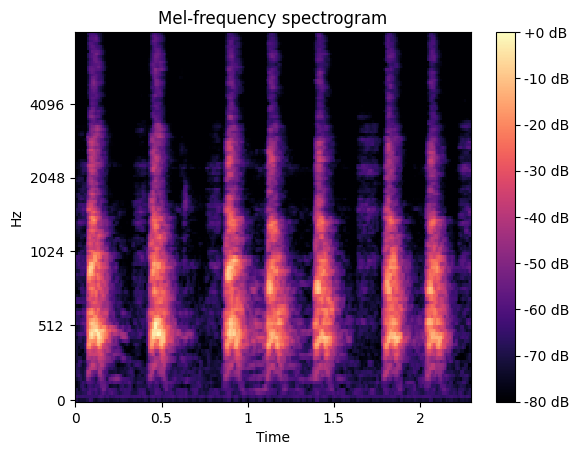

In [29]:
    fig, ax = plt.subplots()
 #print(data1[71][0].shape)\n",
    sample_data = librosa.load(paths[3
                                     ])
    
    #print(sample_data[].shape)
    spect = librosa.feature.melspectrogram(y=np.array(sample_data[0]), sr=sample_data[1], n_mels=128,
                                        fmax=10000)
    print(spect.shape)
    S_dB = librosa.power_to_db(spect, ref=np.max)
    print(S_dB.shape)
    img = librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=48000,
                             fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')

In [31]:
for i in range(0, len(data1)):
       data1[i]  = re_channel(data1[i])
    

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

In [34]:
 def resample(aud, newsr):
      sig, sr = aud
      if (sr == newsr):
        # Nothing to do\n",
        return aud
  
      num_channels = sig.shape[0]
      # Resample first channel
      resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
      if (num_channels > 1):
          # Resample the second channel and merge both channels\n",
          retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
          resig = torch.cat([resig, retwo])
    
          return (resig, newsr)

In [35]:
for i in range(0, len(data1)):
        data1[i]= resample(data1[i], 48000)
    
for i in range(0, len(data1)):
        print(data1[i][0].shape)
        print(data1[i][1])

torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size

In [36]:
print(data1[0][0].shape)
# does padding 0s affect output
maximum = 0
for data in data1:
        maximum =  max(data[0].shape[1], maximum)
maximum

torch.Size([2, 240048])


5280000

In [37]:
 def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms
    
    if (sig_len > max_len):
          # Truncate the signal to the given length\n",
          print("hill")
          sig = sig[:,:max_len]
    
    elif (sig_len < max_len):
          print("hi")
          # Length of padding to add at the beginning and end of the signal\n",
          #pad_begin_len = random.randint(0, max_len - sig_len)\n",
          pad_end_len = max_len - sig_len
          # Pad with 0s\n",
         # pad_begin = torch.zeros((num_rows, pad_begin_len))\n",
          pad_end = torch.zeros((num_rows, pad_end_len))
    
          sig = torch.cat(( sig, pad_end), 1)
    
          return (sig, sr)

In [39]:
 
    for i in range(0, len(data1)):
        print(data1[i][0].shape)
        print(data1[i][1])

torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size

In [ ]:
 "for i in range(0, len(data1)):\n",
    "    data1[i]= pad_trunc(data1[i], 5000)# amount of time each clip is\n",
    "    # ELIF STATEMENT IS BROKEN FOR SOME REASON\n",
    "    # why is it broken???\n",
    "var = 1999935"
   ]

In [40]:
for i in range(0, len(data1)):
   print(data1[i][0].shape)
   print(data1[i][1])

torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size

In [41]:
print(data1[15][0][0])

tensor([-1.9307e-03, -2.8302e-03, -3.3103e-03,  ..., -9.8967e-05,
        -9.3275e-05, -6.2517e-05])


In [42]:
print(type(data1[0][0]))

<class 'torch.Tensor'>


In [ ]:
# # remove talking from recordings\n",

    "# to_remove = 48000 * 8\n",
    "# length = 48000 * 30\n",
    "# data3 = []\n",
    "# to_removeOther = 48000 * 22\n",
    "# #data3 = np.array(data3)\n",
    "# for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) \n",
    "#     samples, rates = data1[i]\n",
    "#     lst1= samples[0].numpy()\n",
    "#     lst2= samples[1].numpy()\n",
    "#     lst1 = lst1[to_remove:]\n",
    "#     lst2 = lst2[to_remove:]\n",
    "#     lst = [lst1, lst2]\n",
    "#     lst = np.array(lst) #makes it much faster\n",
    "#     lst = torch.tensor(lst)\n",
    "#     data3.append((lst, 48000))\n",
    "# for i in range(len(data1) - len(mixedRecordings), len(data1)):# - len(testingPaths) \n",
    "#     samples, rates = data1[i]\n",
    "#     lst1= samples[0].numpy()\n",
    "#     lst2= samples[1].numpy()\n",
    "#     lst1 = lst1[: to_removeOther]\n",
    "#     lst2 = lst2[: to_removeOther]\n",
    "#     lst = [lst1, lst2]\n",
    "#     lst = np.array(lst) #makes it much faster\n",
    "#     lst = torch.tensor(lst)\n",
    "#     data3.append((lst, 48000))\n",
    "# # remove back 8 seconds from non-mandookavani recordings\n",
    "# for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) \n",
    "#     print(data3[i][0].shape)\n",
    "#     print(data3[i][1])\n",
    "# len(data3)"

In [43]:
data3 = data1

In [44]:
print(len(data1))

2018


In [46]:
print(len(data3))
mixedData = data3[len(data3) - len(mixedRecordings):]
data3 = data3[:len(data3) - len(mixedRecordings)]

2018


In [47]:
len(data3)

1518

In [48]:
print(type(data3))

<class 'list'>


In [54]:
"# time shift\n",
def time_shift(aud, shift_limit):
    sig,sr = aud
    sig_len = aud[1]
    shift_amt = int(random.random() * shift_limit * sig_len)
    print(type(sig))
    return (sig.roll(shift_amt), sr)
print(len(data3))
len(mixedData)

1518


500

In [ ]:
print(data1[0][0][1].shape)

In [59]:
 def noise_injection(data,noise_levels=(0, 0.5)):
            sound, sr = data
            print(type(sound[0][0]))
            noise_level = np.random.uniform(*noise_levels)
            noise = np.random.randn(len(sound[0]))
            sound = np.array(sound)
    
            augmented_sound = sound + noise_level * noise
            # Cast back to same data type\n",
            augmented_sound = augmented_sound.astype(type(sound[0]))
            augmented_sound = torch.from_numpy(sound)
            print(type(augmented_sound))
            return (augmented_sound, sr)


In [60]:
def perform_noise_injections(times, data, length):
    for i in range(times):
            for i in range(length):
                data.append(noise_injection(data[i]))
          
    return data

In [61]:
def perform_timeShifts(times, data, length):
    for i in range(times):
        for i in range(length):
            data.append(time_shift(data[i], .5))
        
    return data

In [67]:
TIMES = 100
#data3 = perform_timeShifts(2, data3, 1500)
#mixedData = perform_timeShifts(TIMES * 2, mixedData)
    


In [69]:
 #data3 = perform_noise_injections(2, data3, 1500)

In [70]:
len(data3)

1518

In [71]:
print(len(mixedData))

500


In [72]:
print(type(mixedData))

<class 'list'>


In [73]:
 "# #print(data3[4000][0][0][30000])\n",
    "# print(type(mixedData[0][0][0]))\n",
    "# print()\n",
    "# for i in range(15):\n",
    "    \n",
    "#     new_data = mixedData[i]\n",
    "#     pads = torch.zeros(new_data[1] * 22 - new_data[1] * 6)\n",
    "#     lastPadding = torch.zeros(new_data[1] * 18)\n",
    "#     #print(type(data))\n",
    "#     #print(type(new_data[0][0].numpy()))\n",
    "#   #  new_data[0][0] = new_data[0][0].numpy()\n",
    "#     #new_data[0][1] = np.array(new_data[0][1])\n",
    "#     #print(type(torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6])))\n",
    "#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6]), pads))\n",
    "#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[:new_data[1] * 6]), pads))\n",
    "#    # print(mixedData.shape, new_data.shape)\n",
    "#     print(\"1\")\n",
    "#     mixedData.append(new_data)\n",
    "#     print(\"2\")\n",
    "#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))\n",
    "#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))\n",
    "#     mixedData.append(new_data)\n",
    "#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))\n",
    "#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))\n",
    "#     #print(data[0].shape)\n",
    "#     mixedData.append(new_data)\n",
    "#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 18:]), lastPadding))\n",
    "#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 18:]), lastPadding))\n",
    "#     mixedData.append(new_data)\n",
    "#     print(i) "

IndentationError: unexpected indent (547956874.py, line 2)

In [74]:
print(len(mixedData))

500


In [75]:
 #mixedData = perform_timeShifts(2, mixedData, 500)

In [76]:
 # mixedData = perform_noise_injections(2, mixedData, 500)

'# mixedData = perform_noise_injections(2, mixedData, 500)'

In [77]:
print(len(mixedData))

500


In [78]:
 print(len(mixedData))

500


In [79]:
 # testing_labels = [21, 65, 7]
    # for i in range(TIMES * 4):
    #     testing_labels.extend([21,65,7])
    # # # creating testing labels
    # #MIXED RECORDINGS

In [80]:
 # testingLabels = []
    # testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])
   # # for i in range(15):
    # #     testingLabels.extend([testingLabels[i],testingLabels[i], testingLabels[i], testingLabels[i] ])
    # for i in range(TIMES):
    #     testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])

In [82]:
  #print(len(testingLabels))

In [84]:
instantLabel = updatedTrainingLabels
labels = []
labels.extend(updatedTrainingLabels)
    # for i in range(4):
    #      labels.extend(instantLabel)
        #print(len(labels))
    
       # labels.extend(testingLabels)
    # for i in range(len(labels))
    #         labels[i] = int(labels[i])
    
    # for i in range(0, 4)
    #       print(labels[74])
    #       #0, 30, 51, 9

In [85]:
 
    labels1 = []
    labels1.extend(updatedTestingLabels)
    # for i in range(4):
    # labels1.extend(updatedTestingLabels)

In [86]:
print(updatedTrainingLabels[30])

1


In [90]:
 # mel spectrogram turning its hyperparameters
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
        sig,sr = aud
        top_db = 80
    
        # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
        spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

       # Convert to decibels
        spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
        return (spec)

In [91]:
print(len(labels))

1500


In [93]:
    melData = []
    tf_data = []
    data3.extend(mixedData)
    print(len(data3))
    
    for data in data3:
    
        specto = spectro_gram(data)
    
        melData.append(specto)
    
        # num_channels, num_mels, time
    print("hi")
    for data in melData:
    
        #np_array = data.numpy()# DO I HAVE TO DO THIS LINE?
        np_array = np.array(data)
        tf_data.append(np_array)
    melData = np.array(melData)
    

2018


KeyboardInterrupt: 

In [96]:

     # Augment the Spectrogram by masking out some sections of it in both the frequency
      # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
      # overfitting and to help the model generalise better. The masked sections are
      # replaced with the mean value.
      # ----------------------------
   
def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
        _, n_mels, n_steps = spec.shape
        mask_value = spec.mean()
        aug_spec = spec
   
        freq_mask_param = max_mask_pct * n_mels
        for _ in range(n_freq_masks):
          aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)
    
        time_mask_param = max_mask_pct * n_steps
        for _ in range(n_time_masks):
          aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
        return aug_spec

In [97]:
   print(type(spectro_augment(torch.from_numpy(tf_data[0])).numpy()))

IndexError: list index out of range

In [ ]:
mixedData = tf_data[len(tf_data) - len(mixedData):]
tf_data = tf_data[:len(tf_data) - len(mixedData)]

In [ ]:
print(len(labels))

In [ ]:
 #    initialLen = len(tf_data)
    # for i in range(initialLen): 
  
    #     tf_data.append(spectro_augment(torch.from_numpy(tf_data[i])).numpy())
     

In [ ]:
# labels2 = labels
    # labels.extend(labels2)
    #labels.extend(testingLabels)

In [ ]:
 #print(len(testingLabels))

In [ ]:
for data in tf_data
    print(data.shape)

In [ ]:

tf_data = np.array(tf_data)

In [ ]:
print(len(tf_data))
print(.21
           * len(tf_data))

In [ ]:
 # labels = np.array(labels)
    #testingLabels = np.array(testingLabels)
    
    # training_data = tf_data[:len(data3) - len(mixedData)]
    # testing_data = tf_data[len(data3) - len(mixedData):]
    # training_labels = labels
    
    #mixedData = tf_data[len(tf_data) - len(mixedData):]
    #tf_data = tf_data[: len(tf_data) - len(mixedData)]
    # should i increase the amount of sample in testing set
    print(len(tf_data))
    print(len(labels))
    breakdown = int(.79
                    *len(tf_data))
    training_data = tf_data
    #testing_data = tf_data[breakdown:]
    training_labels = labels
    training_labels = np.array(training_labels)
    # testing_labels = labels[breakdown: ]# numpy arrays with numpy integer
    testing_data = mixedData
    testing_labels = labels1

In [ ]:

    "# use a pretrained model  AlexNet, Mobilenet, Xception\n",
    "# research neural networks \n",
    "\n",
    "print(type(training_data))\n",
    "testing_labels = np.array(testing_labels)"

In [ ]:
print(len(testing_labels))

In [ ]:
   print(testing_labels[9
                         ])

In [ ]:
mixedData = np.array(mixedData)
    
    #testing_data = np.concatenate((testing_data, mixedData))
    #testing_labels = np.concatenate((testing_labels, testingLabels))

In [ ]:
  "testing_data = np.array(testing_data)\n",
    "print(type(testing_labels))"

In [ ]:
  "# training_data = np.rollaxis(training_data,1,3)  \n",
    "# training_data = np.rollaxis(training_data,3,2)  \n",
    "# print(training_data.shape)"

In [ ]:
"# testing_data = np.rollaxis(testing_data,1,3)  \n",
    "# testing_data = np.rollaxis(testing_data,3,2)  \n",
    "# print(testing_data.shape)"

In [ ]:

    model = models.Sequential()
    model.add(layers.Conv2D(32, (2,2), activation='relu', input_shape=( 2,64, 469) ))
    #model.add(layers.MaxPooling2D((1,1)))
    model.add(layers.Conv2D(64, (1,1), activation='relu'))
    #model.add(layers.MaxPooling2D((1,1)))
    model.add(layers.Conv2D(64, (1,1), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (1,1), activation='relu'))
    model.add(layers.Conv2D(128, (1,1), activation='relu'))
    "#model.add(layers.Conv2D(128, (1,1), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(50, activation = 'softmax'))

In [ ]:
 print(len(training_data))

In [ ]:
"# 20 epochs worked well -> more 92.9\n",
    "# 40 epoc -> 95.6 accuracy\n",
    "# 60 -> 98.3 accuracy\n",
    "\n",
    "model.compile(optimizer='adam',\n",
    "              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n",
    "              metrics=['accuracy'])\n",
    "\n",
    "history = model.fit(training_data, training_labels, epochs=20   , \n",
    "                    validation_data=(testing_data, testing_labels))\n",
    "\n",
    "# test 1 recording from test spceies\n",
    "# is mel spectrogram a case\n",
    "# try without augmentaiotn / small nn (40 % training accuracy 0-6% testing accuracy)\n",
    "# try with agmentaiton / small nn ( if jump is not big enough, mel spectrogarm not good neough ( small nn with 92% training accuracy, 66% testing accuracy), validiation accuracy failes to increase afrter accuracy of arround 70 percent training\n",
    "# try with augmentation / big nn (big nn with 93 % training accuracy, 66 accuracy)\n",
    "# svm model"

In [ ]:
  test_loss, test_acc = model.evaluate(testing_data,  testing_labels, verbose=2)
    print(test_acc)
    # how to display confidence scores of each input??? 

In [ ]:
1/ (1 + math.exp(915.83))

In [ ]:
 prediction = model.predict(testing_data).round()
#print(testing_data.shape)
#print(prediction[11][1])
    updated_predictions = []
    maximum = -1
    for i in range(0, len(prediction))
        print(prediction[i][testing_labels[i]] * 100,  \"TestingLabel: \" + str(testing_labels[i]))
        updated_predictions.append((prediction[i][testing_labels[i]] * 100,testing_labels[i]))
        #for j in range(0, len(prediction[i]))
           # if(prediction[i][j] > maximum)
               # maximum = prediction[i][j]
           # if prediction[i][j] < 0
               # prediction[i][j] = 0
           # elif prediction [i][j] < -32
             #  prediction[i][j] = 0
           # else
               # prediction[i][j] = sigmoid(prediction[i][j])
    
    #print(testing_labels[0])
    print(prediction[2])
    #print(maximum)
    #print(\"prediction shape:\", prediction.shape)

In [ ]:
def accuracies_for_each_class(predictions)
        new_predictions  = []
        for i in range(NUM_CLASSES)
            num = 0
            counter =0
            for accuracy in predictions
                if (accuracy[1] == i)
                    num += accuracy[0]
                    counter  = counter + 1
            if counter != 0
                average = num / counter
            else
                average = 0
            new_predictions.append((average, i))
        return new_predictions
            


In [ ]:
    average_predictions = accuracies_for_each_class(updated_predictions)
    print(prediction[15])
    print(average_predictions)

In [ ]:
 print(len(training_data))
    print(len(testing_labels))
    print(len(class_names))
    print(testing_labels.shape)
    print(prediction.shape)
    prediction = np.argmax(prediction, axis = 1)
    print(prediction.shape)
    cm = confusion_matrix(testing_labels, prediction)
    
    print(cm)

In [ ]:
 def plot_confusion_matrix(cm,\n",
                              target_names
                              title='Confusion matrix'
                              cmap=None
                              normalize=True)
        
        given a sklearn confusion matrix (cm), make a nice plot
    
        Arguments
        
        cm:           confusion matrix from sklearn.metrics.confusion_matrix
    
        target_names: given classification classes such as [0, 1, 2]
                      the class names, for example: ['high', 'medium', 'low']
    
        title:        the text to display at the top of the matrix
    
        cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                      see http://matplotlib.org/examples/color/colormaps_reference.html
                      plt.get_cmap('jet') or plt.cm.Blues
    
        normalize:    If False, plot the raw numbers
                      If True, plot the proportions
    
        Usage
    
        plot_confusion_matrix(cm           = cm,                  # confusion matrix created by\n",
                                                                  # sklearn.metrics.confusion_matrix\n",
                              normalize    = True,                # show proportions\n",
                              target_names = y_labels_vals,       # list of names of the classes\n",
                              title        = best_estimator_name) # title of graph\n",
    
        Citiation\n",
    
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    
        import matplotlib.pyplot as plt
        import numpy as np
        import itertools
    
        accuracy = np.trace(cm) / np.sum(cm).astype('float')
        misclass = 1 - accuracy
    
        if cmap is None
            cmap = plt.get_cmap('Blues')
    
        plt.figure(figsize=(200,200))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
    
        if target_names is not None
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)
    
        if normalize
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1]))
            if normalize
                plt.text(j, i, \"{:0.4f}\".format(cm[i, j]),
                         horizontalalignment=\"center\",
                         color=\"white\" if cm[i, j] > thresh else \"black\")
            else
                plt.text(j, i, \"{:,}\".format(cm[i, j]),
                         horizontalalignment=\"center\",
                         color=\"white\" if cm[i, j] > thresh else \"black\")
    

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()

In [ ]:
 
    cmd = ConfusionMatrixDisplay(cm, )
    fig, ax = plt.subplots(figsize=(20,20))
    cmd.plot(ax=ax, )
    plt.xticks(rotation=270)
    plt.show()
    #0, 15, 30, 39, 4, 41, 58, 9

In [ ]:
sns.heatmap(cmd/np.sum(cmd), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# sample = {-1}
    # for predict in prediction
    #     counter = 0
    #     for pre in predict
    #         if(pre  >= .1)
    #             sample.add(counter)
    
    #             counter = 0
    #             break
    #         counter = counter + 1
    # sample

In [ ]:
  # def plot_spectrogram(specgram, title=None, ylabel=\"freq_bin\", ax=None)
    #     if ax is None
    #         _, ax = plt.subplots(1, 1)
    #     if title is not None
    #         ax.set_title(title)
    #     ax.set_ylabel(ylabel)
    #     ax.imshow(librosa.power_to_db(specgram), origin=\"lower\", aspect=\"auto\", interpolation=\"nearest\")
    #     plt.show(block=False)

In [ ]:
# fig, axs = plt.subplots(2, 1)
    # #a = librosa.power_to_db(training_data[0])
    # plot_spectrogram(training_data[0],title=\"spectrogram\", ax=axs[1])

In [ ]:
 # fig, ax = plt.subplots()\n",
    # print(np.array(data1[0][0].shape))
    # sample = np.array(data1[0][0][:1])
    # sample2 = sample
    # print(sample2.shape)
    # spect = librosa.feature.melspectrogram(y=np.array(data1[0][0][:1]), sr=48000, n_mels=128,
    #                                     fmax=8000)
    # print(spect.shape)
    # S_dB = librosa.power_to_db(spect, ref=np.max)
    # print(S_dB.shape)
    # img = librosa.display.specshow(S_dB, x_axis='time'
    #                          y_axis='mel', sr=48000
    #                          fmax=8000, ax=ax)
    # fig.colorbar(img, ax=ax, format='%+2.0f dB')
    # ax.set(title='Mel-frequency spectrogram')